“Building Permits in 2009”, Accessed from https://opendata.dc.gov/datasets/building-permits-in-2009?geometry=-81.277%2C38.554%2C-72.608%2C41.498 on 12/10/2019 

“Building Permits in 2010”, Accessed from https://opendata.dc.gov/datasets/building-permits-in-2010?geometry=-81.277%2C38.554%2C-72.608%2C41.498 on 12/10/2019 

“Building Permits in 2011”, Accessed from https://opendata.dc.gov/datasets/building-permits-in-2011?geometry=-81.277%2C38.554%2C-72.608%2C41.498 on 12/10/2019 

“Building Permits in 2012”, Accessed from https://opendata.dc.gov/datasets/building-permits-in-2012?geometry=-81.277%2C38.554%2C-72.608%2C41.498 on 12/10/2019 

“Ward from 2012”, Accessed from https://opendata.dc.gov/datasets/0ef47379cbae44e88267c01eaec2ff6e_31?geometry=-77.556%2C38.707%2C-76.473%2C39.081 on 12/10/2019 

“Wards by Population in 2002”, Accessed from https://opendata.dc.gov/datasets/wards-by-population-in-2002?geometry=-78.103%2C38.707%2C-75.925%2C39.081 on 12/10/2019 

# Introduction

Google defines "Gentrification" as the the process of renovating and improving a house or district so that it conforms to middle-class taste. This concept has been really prevalent in the media as we, as a society, have been becoming more aware of the injustices that plague our day to day lives. Gentrification not only adds bland conformity to our colorful cities, but also displaces low-income and minority citizens. The big question is how do you measure Gentrification? Sure you can visibly SEE the changes, but how are those changes reflected through data? Moreso, what specifically leads to Gentrification and how can we limit it in the future?

To answer these questions, I looked at Washington D.C. I feel like DC is an excellent example of gentrification. In the 1970s and 1980s, DC was regarded as "Dodge City". It was referred to as such due to high crime rates as well as low income. However, in recent years it has become an upper-middle class utopia so much so that the Washington Post reported it to be the city with the highest rates of Gentrification.

In order to observe and measure Gentrification, I primarily looked at Census Informationan and Approved Building Permits in DC. I recieved all my data from OpenDataDC. To better observe the trends and work with given data, I decided to look at how Median Income and the ammount of Building Permits issued across DC's 8 wards changed from 2002 to 2012. 


# Method

To begin the analysis, I started by reading in the data. There were several different CSV files so I made a unique variable for each. The CSVs contained a lot of useful data; however all of it was not relevant to my research goal. In order to seperate what I needed from everything else, I create a subsetted dataframe from each of the CSV.

After subsetting the data, I merged similar dataframes together to make them easier to manipulate and work with. I did this on the "Ward" columns across both my types of data so that in the end I could combine them if neccessay(which I did).

The next step are calculations. For the income table, I added a column that calculated the net change in median income from 2002 to 2012. I did this by subtracting the 2012 income from the 2002 income. I then divide this number by the 2002 income and multiply by 100. Positive number indicate an increase while negative number would indicate a decrease. For the Building Permit table I simply added up all 4 years to get the total ammount of building permits for each ward.

At this point, I had 3 dataframes; Income, Building Permits, All Data.

From here, I made 3 seperate graphs to meaningfully represent the data. I made a Map, a Line plot, and a Scatter Plot. 

For the map, I used the GeoPandas library. This helps you plot geographical data in order to make useful visualizations. This visualization shows each ward as a specific shade of blue that corresponds to their net change in Median income. The darker the blue, the more positive the change was.

For the line plot, I had to manipulate the dataframes to get it into the right format. I made a copy of the Permit table then melted it to have the years as one column. From there, I pivoted it to have it indexed by year with Wards being their own columns. After this was done, I used the .plot function to make a line for each ward to represent how their number of permits changed from year to year.

For the scatter plot, I made a subset of the total number of permits, the net change, and the ward. From there, I used the .plot function (specifcally scatter) to create the plot. This plot represents the relationship between the net change of a ward to the number of building permits. Below the plot, I also ran a Correlation to see what the correlation coefficient between the two is (because it is not evident from just seeing the plot).

# Preprocessing

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [58]:
two_data = pd.read_csv('2002 Data.csv')
twelve_data = pd.read_csv('2012 Data.csv')

nine_perm = pd.read_csv('2009 Permits.csv')
ten_perm = pd.read_csv('2010 Permits.csv')
eleven_perm = pd.read_csv('2011 Permits.csv')
twelve_perm = pd.read_csv('2012 Permits.csv')

C:\Users\assef\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
two_rel = two_data[['WARD_ID', 'MINC_DL']]
two_rel.columns = ['Ward', '2002_MI']

twel_rel = twelve_data[['WARD', 'MEDIAN_HH_INCOME']]
twel_rel.columns = ['Ward', '2012_MI']

data = pd.merge(two_rel, twel_rel, how='inner', on='Ward')
data = data.reset_index()
data.columns = ["1", 'Ward', '2002_MI', '2012_MI']

del data["1"]

data = data.sort_values(by=['Ward'])
data['Percent_Change'] = (((data['2012_MI'] - data['2002_MI'])/ data['2002_MI'])*100)
data

,Ward,2002_MI,2012_MI,Percent_Change
3,1,36902,82159,122.641049
4,2,44742,100388,124.370837
2,3,71875,112873,57.040696
1,4,46408,74600,60.748147
0,5,34433,57554,67.147794
7,6,41554,94343,127.037108
6,7,30533,39165,28.271051
5,8,25017,30910,23.555982


In [116]:
build_count_09 = nine_perm[['WARD', 'PERMIT_ID']].groupby(['WARD']).count()
build_count_09 = build_count_09.reset_index()
build_count_09.columns = ['Ward', '2009']

build_count_10 = ten_perm[['WARD', 'PERMIT_ID']].groupby(['WARD']).count()
build_count_10 = build_count_10.reset_index()
build_count_10.columns = ['Ward', '2010']

build_count_11 = eleven_perm[['WARD', 'PERMIT_ID']].groupby(['WARD']).count()
build_count_11 = build_count_11.reset_index()
build_count_11.columns = ['Ward', '2011']

build_count_12 = twelve_perm[['WARD', 'PERMIT_ID']].groupby(['WARD']).count()
build_count_12 = build_count_12.reset_index()
build_count_12.columns = ['Ward', '2012']

building_data = pd.merge(build_count_09, build_count_10, how='inner', on='Ward')
building_data = pd.merge(building_data, build_count_11, how='inner', on='Ward')
building_data = pd.merge(building_data, build_count_12, how='inner', on='Ward')

building_data["4_Year_Total"] = (building_data["2009"]+building_data["2010"]+building_data["2011"]+building_data["2012"])
building_data

,Ward,2009,2010,2011,2012,4_Year_Total
0,1,2773,3048,3425,3694,12940
1,2,6516,7412,8798,9332,32058
2,3,3638,4189,4639,4933,17399
3,4,2954,3832,3798,4363,14947
4,5,2933,3834,4345,5456,16568
5,6,5411,6444,7119,6678,25652
6,7,2023,2258,2344,2467,9092
7,8,1719,1825,1909,1715,7168


In [147]:
total_data = pd.merge(building_data, data, how='inner', on='Ward')
total_data

,Ward,2009,2010,2011,2012,4_Year_Total,2002_MI,2012_MI,Percent_Change
0,1,2773,3048,3425,3694,12940,36902,82159,122.641049
1,2,6516,7412,8798,9332,32058,44742,100388,124.370837
2,3,3638,4189,4639,4933,17399,71875,112873,57.040696
3,4,2954,3832,3798,4363,14947,46408,74600,60.748147
4,5,2933,3834,4345,5456,16568,34433,57554,67.147794
5,6,5411,6444,7119,6678,25652,41554,94343,127.037108
6,7,2023,2258,2344,2467,9092,30533,39165,28.271051
7,8,1719,1825,1909,1715,7168,25017,30910,23.555982


# Results

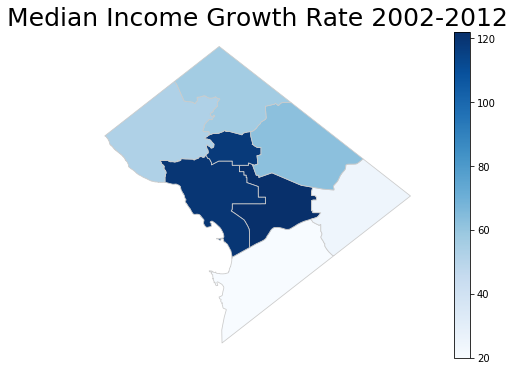

In [85]:
map_DC = gpd.read_file('DC_Shapefile/Ward_from_2012.shp')

merged = map_DC.set_index('WARD').join(data.set_index('Ward'))
merged.head()


variable = 'Percent_Change'
vmin, vmax = 20, 122
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Median Income Growth Rate 2002-2012', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

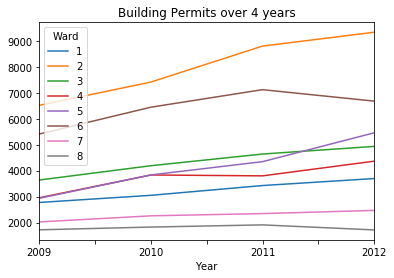

In [143]:
graph_df = building_data.copy()
del graph_df['4_Year_Total']
graph = pd.melt(graph_df, id_vars=['Ward'], value_vars=['2009', '2010', '2011', '2012'], var_name = 'Year', value_name='Number_of_Permits')

line_fin = graph.pivot(index='Year', columns='Ward', values='Number_of_Permits')
ax.set_ylabel("Number of Building Permits")

line_fin.plot(title= "Building Permits over 4 years")

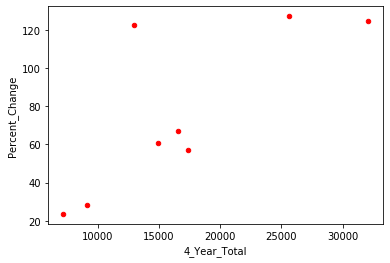

In [149]:
scatter_data = total_data[['Ward', 'Percent_Change', '4_Year_Total']]
scatter_data.plot(kind='scatter',x='4_Year_Total',y='Percent_Change',color='red')

In [151]:
pearsoncorr = scatter_data.corr(method='pearson')
pearsoncorr

,Ward,Percent_Change,4_Year_Total
Ward,1.000000,-0.652636,-0.452886
Percent_Change,-0.652636,1.000000,0.765043
4_Year_Total,-0.452886,0.765043,1.000000


# Discussion

Looking at the map, you can see that there are distinct divisions between the areas with major increase in Median income. Wards 1,2,6 are the areas with almost 120% increases. That over 2 times what is was before. Wards 3,4,5 also received a hefty increase to their Median Income. And when you look at Wards 7,8 they increased by a measly 20%. However, these are just numbers. Lets think of it from a geophysical perpespective. Wards 1,2,6 are home to Capitol Hill and Downtown DC. It would make sense that these areas would attract higher income citizens. 

Similarly, the line graph make sense when you consider the maginitude of the areas that are consistenly high. One thing that I did notice was that Ward 5 had a uptick in Building Permits. Further investigation on planning.dc.gov revealed that several new town houses and neighborhoods had been developed in Ward 5, along with the inclusion of a new town centre. This falls in line with the definition of gentrification I provided earlier.

Finally, the scatter plot showed there to be a positve relationship between a net change in Median income and building permits. On a scale of -1 to 1, the scatterplot had a score of .76, meaning the relationship is strong. For every increase in building permits, there is an increase in net income. This does not neccesarily mean that one causes the other, but they are heavily related with one another. This is consistent with other studies done about Gentrification.

# Limitations

Some factors that limited the scope and extent of my analysis are confouding variables and misleading/incomplete data. Several things can impact both an increase in Median Income and Building Permits. For example heavy damage to building from natural disaster can result in a higher ammount of building permits for a given ward. DC also recently increased minimum wage. These factors could skew the analysis heavily

Another issue that could possibly impact the analysis is misleading data. One thing I considered was the fact that that inflation might contribute to why the rapid increases in median income. Another thing that could hurt the credibility is missing data. On OpenData, there was only Permit data from 2009-2012. That means 6 years are neglected. Similarly, the site only had income data for a sporadic set of years. I had to pick and choose specifc data that I felt would give a representative overview of the problem. This is not only misleading, but also introduces bias.

# Conclusion

In summary, there seems to be positive correlation between the ammount of building permits and net median income a ward has. However, due to confounding variables and incomplete data further investigation is required to understand whether or not DC is truly becoming gentrified. This new analysis should also take into account the history of the area in order to make sure of the results.